In [129]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [130]:
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [131]:
df = sns.load_dataset('titanic')

In [132]:
df = df[['survived' , 'fare' , 'age']]

In [133]:
df.head()

,survived,fare,age
0,0,7.2500,22.0
1,1,71.2833,38.0
2,1,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0


In [134]:
df.isnull().sum()

survived      0
fare          0
age         177
dtype: int64

In [135]:
df['age'] = df['age'].fillna(np.mean(df['age']))

Text(0.5, 1.0, 'Fare Distribution')

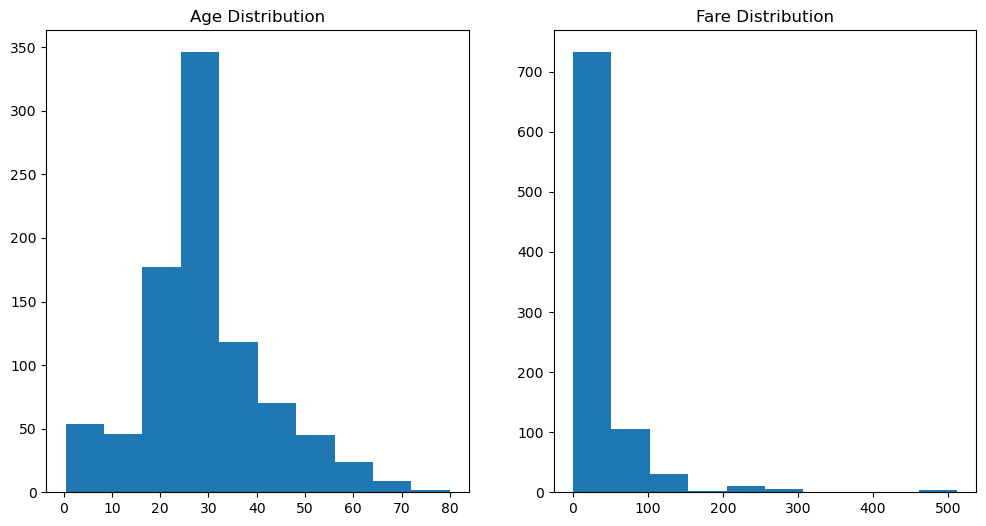

In [136]:
# Distribution of values before transformation
fig , axes = plt.subplots(nrows=1, ncols=2  ,figsize=(12,6))
axes[0].hist(df['age'])
axes[0].set_title("Age Distribution")
axes[1].hist(df['fare'])
axes[1].set_title("Fare Distribution")

In [137]:
X = df.iloc[: , 1:3]
y = df.iloc[: , 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [138]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()

In [139]:
clf1.fit(X_train , y_train)
clf2.fit(X_train , y_train)

RandomForestClassifier()

In [140]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy of Logistic Reg: " , accuracy_score(y_test,y_pred1))
print("Accuracy of Random forest: " , accuracy_score(y_test,y_pred2))

Accuracy of Logistic Reg:  0.6424581005586593
Accuracy of Random forest:  0.659217877094972


In [141]:
# Applyig Log transformation on Age and Fare
trf = FunctionTransformer(np.log1p) # log1p adds 1 in each value of the column this is just for value not being 0

In [142]:
df['age'] = trf.fit_transform(df['age'])
df['fare'] = trf.fit_transform(df['fare'])

Text(0.5, 1.0, 'Fare Distribution')

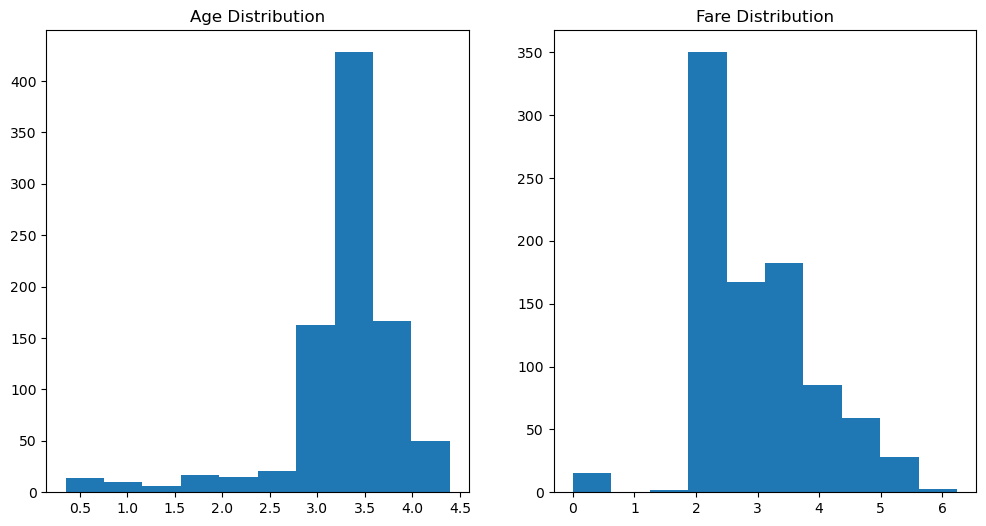

In [143]:
# Distribution of values After transformation
fig , axes = plt.subplots(nrows=1, ncols=2  ,figsize=(12,6))
axes[0].hist(df['age'])
axes[0].set_title("Age Distribution")
axes[1].hist(df['fare'])
axes[1].set_title("Fare Distribution")

In [144]:
X = df.iloc[: , 1:3]
y = df.iloc[: , 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [145]:
# Model After trasnformations
clf1.fit(X_train , y_train)
clf2.fit(X_train , y_train)

RandomForestClassifier()

In [146]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy of Logistic Reg: " , accuracy_score(y_test,y_pred1))
print("Accuracy of Random forest: " , accuracy_score(y_test,y_pred2))

Accuracy of Logistic Reg:  0.6703910614525139
Accuracy of Random forest:  0.6703910614525139


In [147]:
# We can see distribution of Age is shifted towards right 
# we Will go and apply log only on fare as log works better on right skewed

In [148]:
df = sns.load_dataset('titanic')
df = df[['survived' , 'fare' , 'age']]
df['age'] = df['age'].fillna(np.mean(df['age']))
df.head()

,survived,fare,age
0,0,7.2500,22.0
1,1,71.2833,38.0
2,1,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0


C:\Users\reliance\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\reliance\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q plot of Fare')

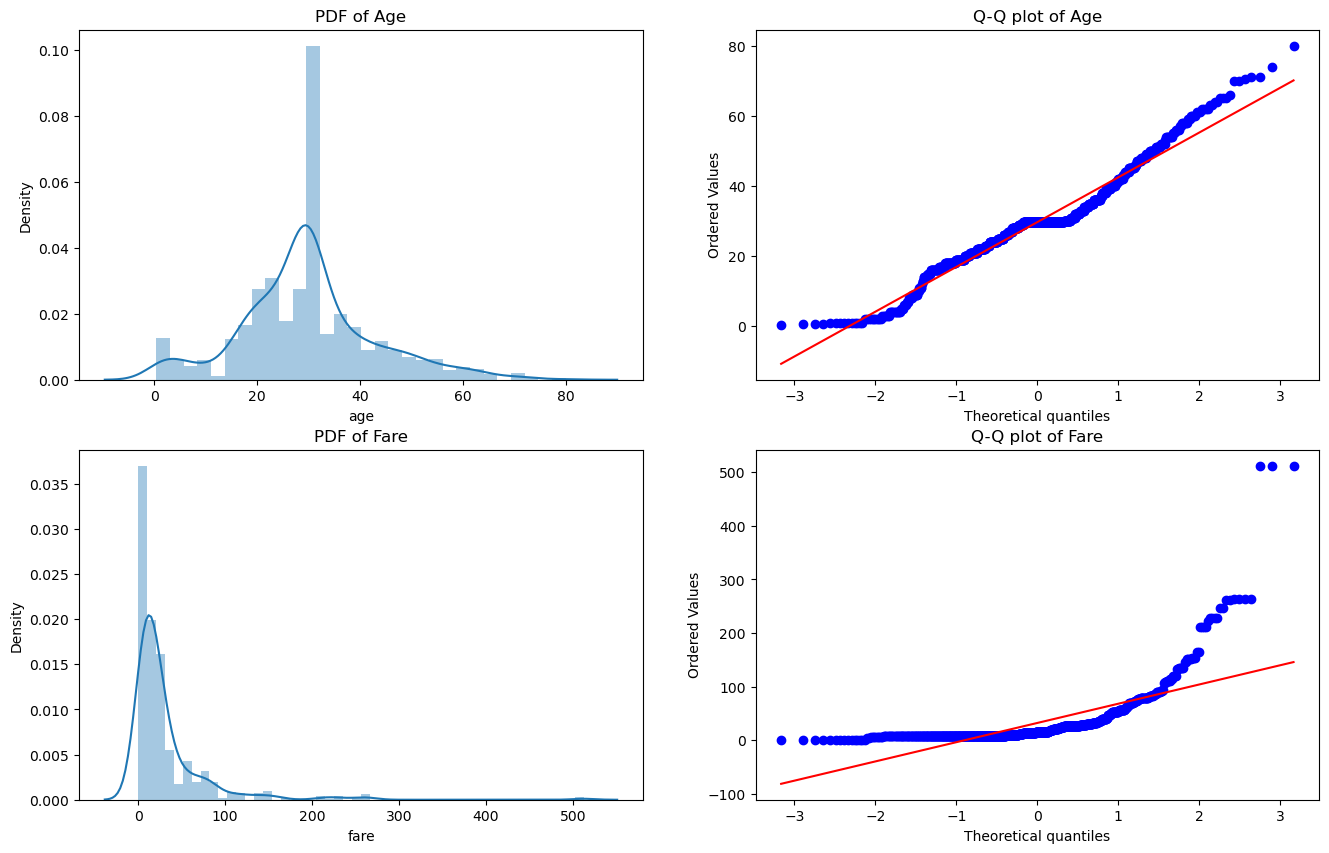

In [149]:
# Check out the QQ plot for both the columns
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.distplot(df['age'])
plt.title("PDF of Age")

plt.subplot(222)
stats.probplot(df['age'] , dist='norm' , plot=plt)
plt.title("Q-Q plot of Age")

plt.subplot(223)
sns.distplot(df['fare'])
plt.title("PDF of Fare")

plt.subplot(224)
stats.probplot(df['fare'] , dist='norm' , plot=plt)
plt.title("Q-Q plot of Fare")

In [150]:
X = df.iloc[: , 1:3]
y = df.iloc[: , 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [151]:
# Lets apply transformation on fare column only as it is right skewed
trf_col = ColumnTransformer([('log' , FunctionTransformer(np.log1p) ,['fare'])] , remainder='passthrough')

In [152]:
X_train_transformed = trf_col.fit_transform(X_train)
X_test_transformed = trf_col.transform(X_test)

In [154]:
# Model After trasnformations
clf1.fit(X_train , y_train)
clf2.fit(X_train , y_train)

RandomForestClassifier()

In [155]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy of Logistic Reg: " , accuracy_score(y_test,y_pred1))
print("Accuracy of Random forest: " , accuracy_score(y_test,y_pred2))

Accuracy of Logistic Reg:  0.6424581005586593
Accuracy of Random forest:  0.6759776536312849


In [156]:
# Like this we can transform columns using any function(we can Use our own function as well)